In [96]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [97]:
# read csv
sms = pd.read_csv('C:\\Users\\rachit\\Documents\\spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'class','v2':'message'})
sms.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
# make a copy of message column
text_feat = sms['message'].copy()
text_feat.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [99]:
# remove stop words, punctuation and do stemming
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [100]:
text_feat = text_feat.apply(text_process)
text_feat.head()

0    go jurong point crazi avail bugi n great world...
1                               ok lar joke wif u oni 
2    free entri 2 wkli comp win fa cup final tkts 2...
3                 u dun say earli hor u c alreadi say 
4           nah dont think goe usf live around though 
Name: message, dtype: object

In [101]:
# extract features
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

In [102]:
# split features to test and training set
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['class'], test_size=0.3, random_state=111)

In [103]:
# import some classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## test various parameters for classifiers

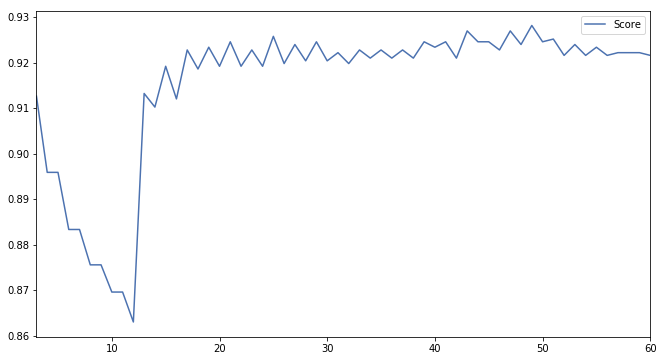

In [104]:
# K-Neighbours Classifier

pred_scores = []
for i in range(3,61):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [105]:
df[df['Score'] == df['Score'].max()]

,Score
49,0.92823


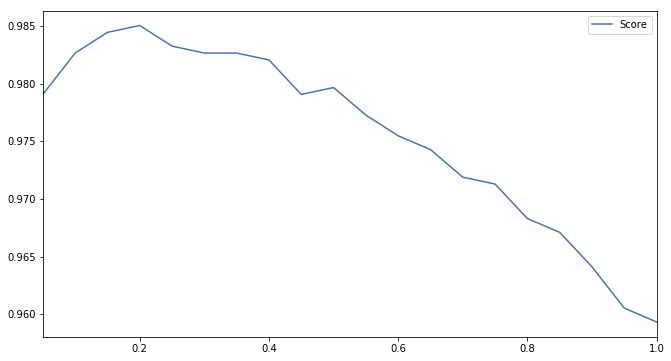

In [106]:
# Multinominal NaiveBayes Classifier

pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    pred = mnb.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [107]:
df[df['Score'] == df['Score'].max()]

,Score
0.2,0.985048


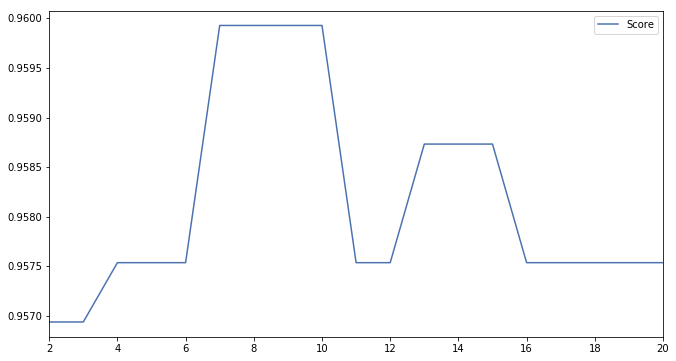

In [108]:
# decision tree classifier
pred_scores = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [109]:
df[df['Score'] == df['Score'].max()]

,Score
7,0.959928
8,0.959928
9,0.959928
10,0.959928


In [110]:
# initialize classifiers with optimal parameters obtained from above
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)

In [111]:
# make classifer dictionary
clfs = {'KN' : knc, 'NB': mnb, 'DT': dtc} 

In [112]:
# functions to fit our classifiers and make predictions
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

def predict_labels(clf, features):
    return (clf.predict(features)) 

In [113]:
# iterate through classifiers and save the results
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [114]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
KN,0.928230
NB,0.985048
DT,0.959928


## best classifier: MultinomialNaiveBayes 

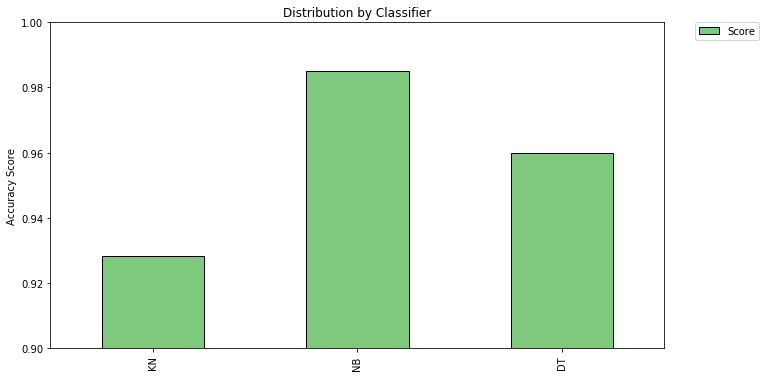

In [115]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(3), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## What about Message length?

In [116]:
# add feature: message length
sms['length'] = sms['message'].apply(len)
sms.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# lengthier msg = likely a spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000205806E0828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000205807AC2B0>], dtype=object)

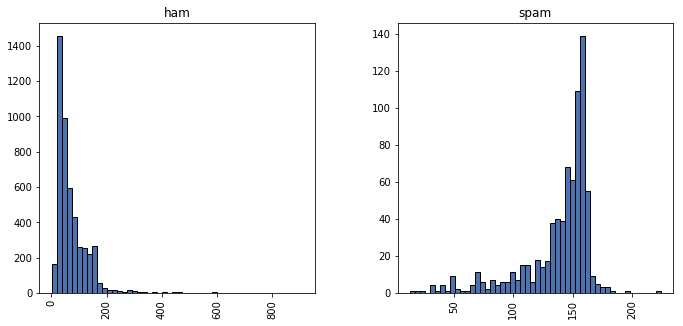

In [117]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-deep')
sms.hist(column='length', by='class', bins=50,figsize=(11,5))

## append message length feature to the matrix we fit into our classifiers

In [118]:
lf = sms['length'].as_matrix()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [119]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['class'], test_size=0.3, random_state=111)

In [120]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

## Every classifier doing a bit worse

In [121]:
df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
KN,0.928230,0.880383
NB,0.985048,0.982656
DT,0.959928,0.957536


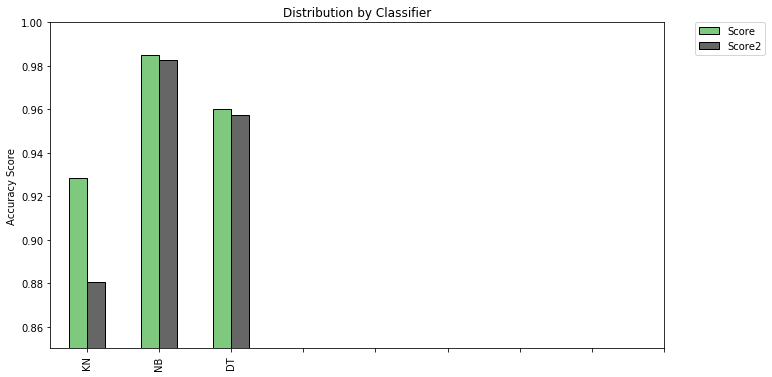

In [122]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)